In [1]:
import numpy as np
import random
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import xlrd
import math
from time import *
import matplotlib.pyplot as plt

In [2]:
data_path='./data/'
DSS1 = np.loadtxt(data_path + 'DSS1.txt')
DSS2 = np.loadtxt(data_path + 'DSS2.txt')
DSS = (DSS1 + DSS2) / 2
DGS = np.loadtxt(data_path + 'DGS.txt')

IDS = np.zeros(shape = (DSS.shape[0], DSS.shape[1]))
for i in range(DSS.shape[0]):
    for j in range(DSS.shape[1]):
        if DSS[i][j] == 0:
            IDS[i][j] = DGS[i][j]
        else:       
            IDS[i][j] = DSS[i][j]  

MFS = np.loadtxt(data_path + 'MFS.txt')
MGS = np.loadtxt(data_path + 'MGS.txt')

IMS = np.zeros(shape = (MFS.shape[0], MFS.shape[1]))
for i in range(MFS.shape[0]):
    for j in range(MFS.shape[1]):
        if MFS[i][j] == 0:
            IMS[i][j] = MGS[i][j]
        else:
            IMS[i][j] = MFS[i][j]

MD = np.zeros(shape = (DSS.shape[0], MFS.shape[0]))
asso_file =  xlrd.open_workbook(data_path + 'Human miRNA-disease associations.xlsx')
asso_pairs = asso_file.sheets()[0]
for i in range(asso_pairs.nrows):
    asso = asso_pairs.row_values(i)
    m = int(asso[0])
    n = int(asso[1])
    MD[n-1,m-1]=1

known=[]
unknown=[]

for x in range(MD.shape[0]):
    for y in range(MD.shape[1]):
        if MD[x,y]==0:
            unknown.append((x,y))
        else:
            known.append((x,y))

posi_list = []
unlabelled_list = []
all_list = []

for i in range(len(known)):
    posi=IDS[known[i][0],:].tolist() + IMS[known[i][1],:].tolist()
    posi_list.append(posi)
    all_list.append(posi)

for i in range(len(unknown)):
    unlabelled=IDS[unknown[i][0],:].tolist() + IMS[unknown[i][1],:].tolist()
    unlabelled_list.append(unlabelled)
    all_list.append(unlabelled)

random.shuffle(all_list)           

In [ ]:
#Each iteration takes approximately 800 seconds
cs_list = []
n_cls = range(2,26)
for i in n_cls:
    begin_time = time()
    cls = MiniBatchKMeans(n_clusters = i, batch_size = 3072).fit(all_list)
    sc = silhouette_score(all_list, cls.labels_, metric='euclidean')
    cs_list.append(sc)
    end_time = time()
    run_time = end_time - begin_time
    result = 'When the number of clusters is ' + str(i) + ', the Silhouette Coefficient of the clustering result is ' + str(sc) +'\n'
    result = result + 'The execution time of this iteration is ' + str(round(run_time, 2)) + 's\n'
    print(result)

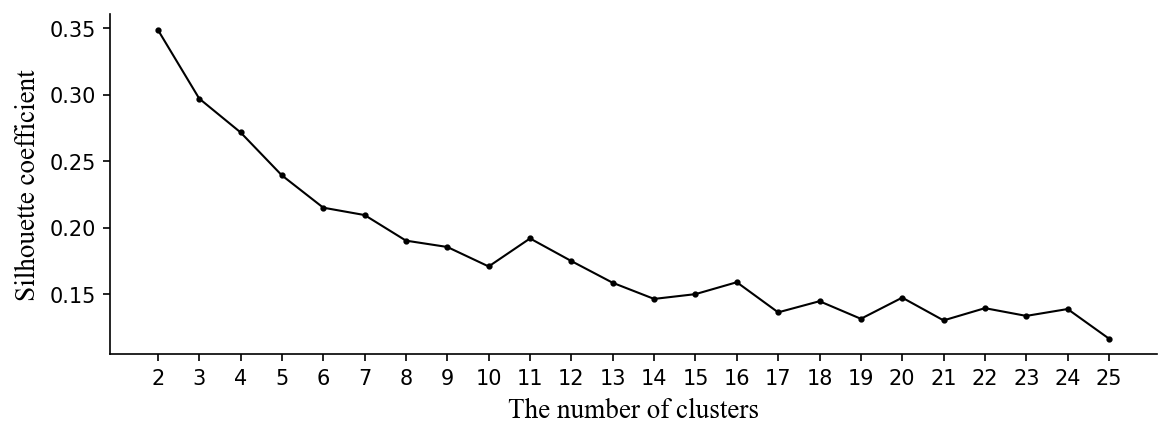

In [16]:
plt.figure(figsize=(9, 3), dpi=150)
plt.plot(n_cls, cs_list, color='black', linestyle='-', linewidth='1', \
         marker='.', markersize='4')
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('The number of clusters', fontname='Times New Roman', fontsize=13)
ax1.set_ylabel('Silhouette coefficient', fontname='Times New Roman', fontsize=13)
ax1.set_xticks(np.arange(2,26))
plt.show()